# 大数の法則と中心極限定理のシミュレーション

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## 大数の法則, Law of Large Numbers

<ipython-input-7-e06a130ffb58>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[0,0,k] = stats.uniform.rvs(loc=uniform_variable[0],scale=uniform_variable[1],size=1) # [loc, loc+scale]
<ipython-input-7-e06a130ffb58>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[1,0,k] = stats.norm.rvs(loc=norm_variable[0], scale=norm_variable[1], size=1) # N(loc, scale**2)
<ipython-input-7-e06a130ffb58>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[2,0,k] = stats.bino

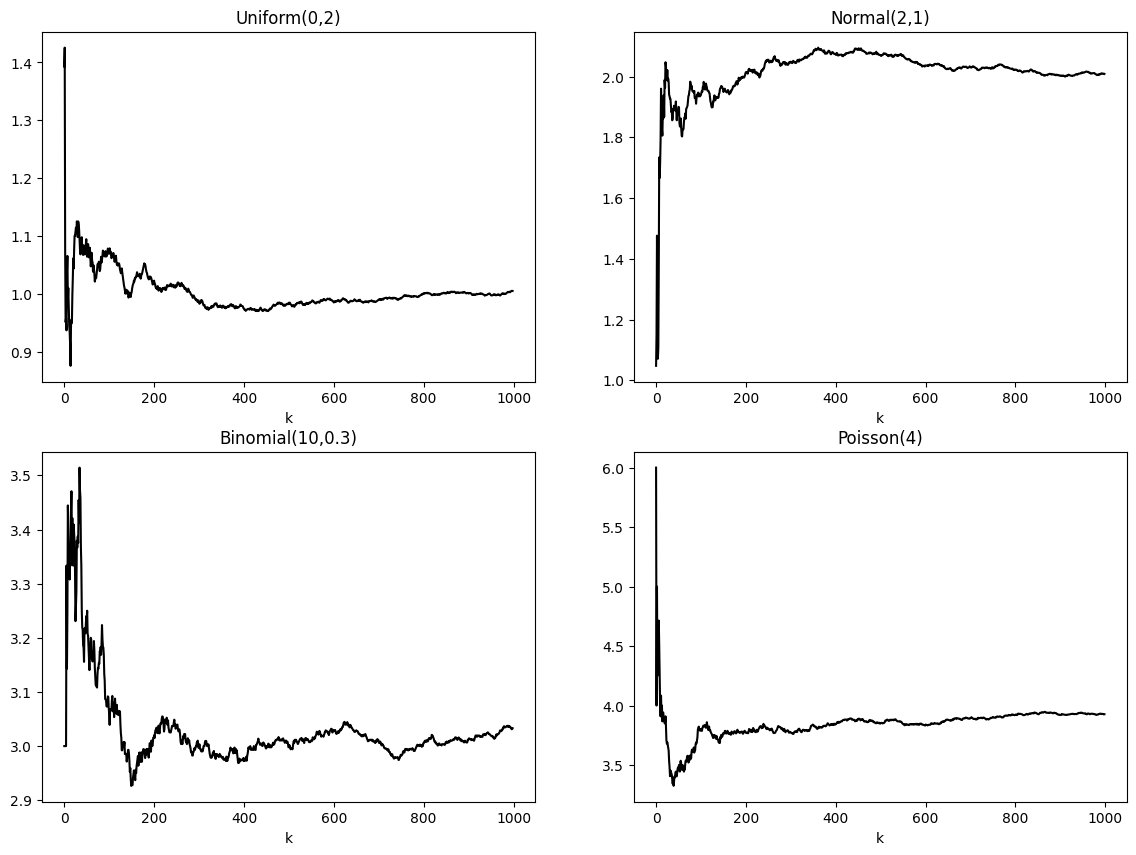

In [ ]:
np.random.seed(123)
nsample = 1000
x = np.zeros((4,2,nsample))

# uniform_variable = [minimun number, scale]
uniform_variable = [0, 2]

# norm_variable = [mean, standard deviation]
norm_variable = [2, 1]

# binom_variable = [number of attemps, probability]
binom_variable = [10, 0.3]

# poisson_variable = [mean]
poisson_variable = [4]

for k in range(nsample):
    x[0,0,k] = stats.uniform.rvs(loc=uniform_variable[0],scale=uniform_variable[1],size=1) # [loc, loc+scale]
    x[1,0,k] = stats.norm.rvs(loc=norm_variable[0], scale=norm_variable[1], size=1) # N(loc, scale**2)
    x[2,0,k] = stats.binom.rvs(n=binom_variable[0], p=binom_variable[1], size=1) # E[x] = np
    x[3,0,k] = stats.poisson.rvs(mu=poisson_variable[0], size=1) # E[x] = mu
    for i in range(4):
        if k >= 1: x[i,1,k] = np.mean(x[i, 0, 0:k])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

titles = []
titles.append('Uniform(' + str(uniform_variable[0]) + ',' + str(uniform_variable[1]) + ")")
titles.append('Normal(' + str(norm_variable[0]) + ',' + str(norm_variable[1]) + ")")
titles.append('Binomial(' + str(binom_variable[0]) + ',' + str(binom_variable[1]) + ")")
titles.append('Poisson(' + str(poisson_variable[0]) + ")")

for i in range(4):
    ncol=i//2; nrow=i%2 # 切捨て除算，剰余
#    print(i, ncol, nrow)
    ax[ncol, nrow].plot(x[i,1,1:], color='k')

    ax[ncol, nrow].set_xlabel('k')
    ax[ncol, nrow].set_title(titles[i])

#plt.savefig('fig_SM_LawOfLargeNumber.png', bbox_inches='tight')
plt.show()

## 中心極限定理, Central Limit Theorem
ポアソン分布Poisson($\lambda$)に従う確率変数$X$の平均値と分散は次である。
$$
E[x] = \lambda, \;\;\;\;\; V[x] = \lambda
$$

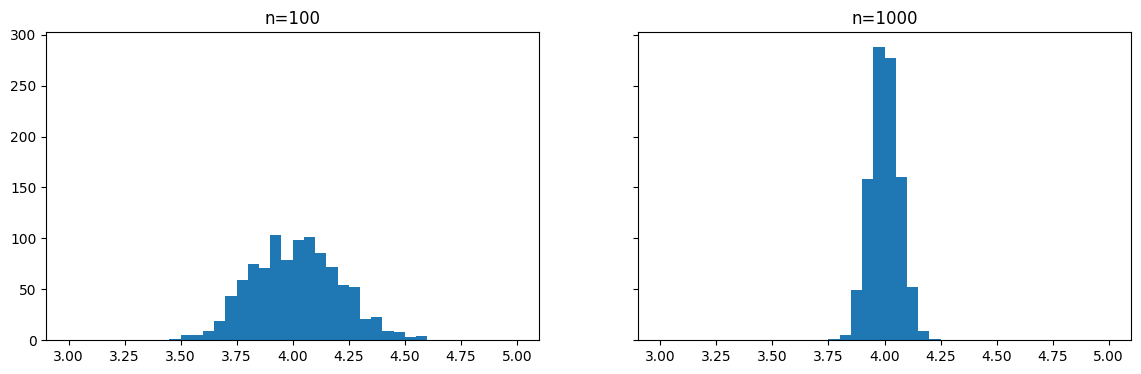

In [3]:
np.random.seed(123)
n1, n2 = 100, 1000
nsample = 1000
x1 = np.zeros(nsample)
x2 = np.zeros(nsample)

for k in range(nsample):
    x1[k] = np.mean(stats.poisson.rvs(mu=4, size=n1))
    x2[k] = np.mean(stats.poisson.rvs(mu=4, size=n2))

fig, ax = plt.subplots(ncols=2, figsize=(14,4), sharey = True)
ax[0].hist(x1, bins=40, range=(3.0, 5.0))
ax[0].set_title('n='+str(n1))
ax[1].hist(x2, bins=40, range=(3.0, 5.0))
ax[1].set_title('n='+str(n2))

#plt.savefig('fig_SM_CentralLimit.png', bbox_inches='tight')
plt.show()

In [ ]:
print(np.mean(x1), np.mean(x2))